In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [133]:
url=r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"

In [134]:
#downloading and exploring the dataset
#shaping the data set')
df=pd.read_csv(url)

In [135]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [136]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [137]:
#it is easy to understand the columns ,as it is self explanatory
#Fnlwgt: sampling weight
#Education_num: number of years of education in total
#Capital_gain/Capital_loss: income from investment sources other than salary/wages


# #Statistical Analysis

##Data Integrity Check

#lets check for duplicate dat before proceeding futhur

In [138]:
df.duplicated().sum()

24

In [ ]:
##if we check the csv file , we have missing values where there is '?'
#checking total "?"in the data 

In [139]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

# #Let replace ' ?' with np.NaN


In [140]:

df=df.replace(' ?',np.NaN)

# #Let check if any whitespace, 'NA' or '-' exist in dataset.

In [141]:
df.isin([' ','-','NA']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [142]:
##great ,now since there is no void values ,we can proceed furthur...
#let drop duplicated entry from dataset before checking null values.

df.drop_duplicates( inplace=True)


In [143]:
df.shape

(32536, 15)

In [ ]:
##hence the duplicate vslues are now dropped.

##cehcking the null values in the data set

In [144]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [ ]:
#Comment:
#There are missing values in Occupation,workclass, Native country.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


##Observation:

There are 32536 rows , 14 Independent columns and 1 Target feature.

Age,Fnlwgt, education_num, capital gain, capital loss, hours per week are Numerical variable and having int64 datatypes.


Work class, Education,Marital status, occupation, relationship, race,sex,native country are categorical feature with object datatypes.



In [146]:
# Missing value imputation
#Occupation, Workclass and Native Country are categorical variable so we can imputate them with mode of that feature.

## Imputating Missing value with mode for categorical features

df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [147]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [ ]:
##now we can proceed as now no null values are present

## EDA OF DATA

In [148]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


 ##Observation:
1. The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
2. The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
3. While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
4. The number of hours spent per week varies between 1 to 99 and the average being 40 hours.


In [149]:
df[['Occupation','Age',"Workclass"]].value_counts()

Occupation         Age  Workclass        
 Other-service     19    Private             153
                   18    Private             141
 Prof-specialty    20    Private             137
 Other-service     21    Private             134
                   20    Private             129
                                            ... 
                   22    Local-gov             1
                         Federal-gov           1
                   21    Self-emp-not-inc      1
                   20    Federal-gov           1
 Transport-moving  90    Private               1
Length: 2777, dtype: int64

In [150]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## our target variable is income ,ie based on different categories ,we have to find out  the income  

<AxesSubplot:xlabel='Income', ylabel='Age'>

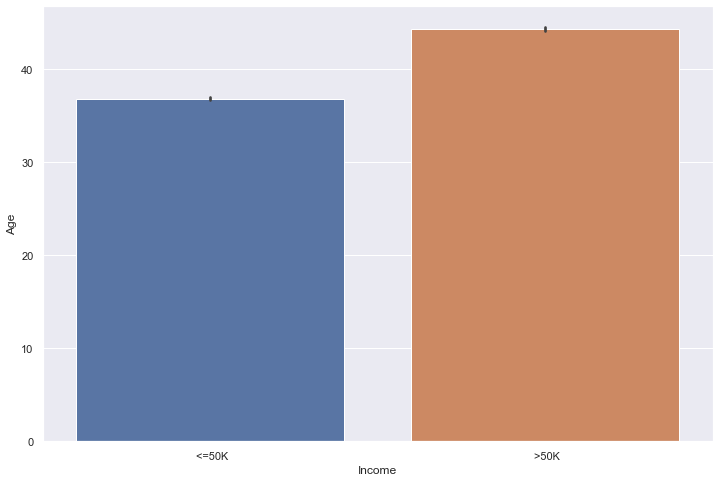

In [152]:
#plotting barplot between age and income
fig=plt.figsize=(15,12)
sns.barplot(x='Income',y='Age',data=df)


# #observation
1. there are more number of people with less than 50000 income 

Text(0.5, 0, 'Age group')

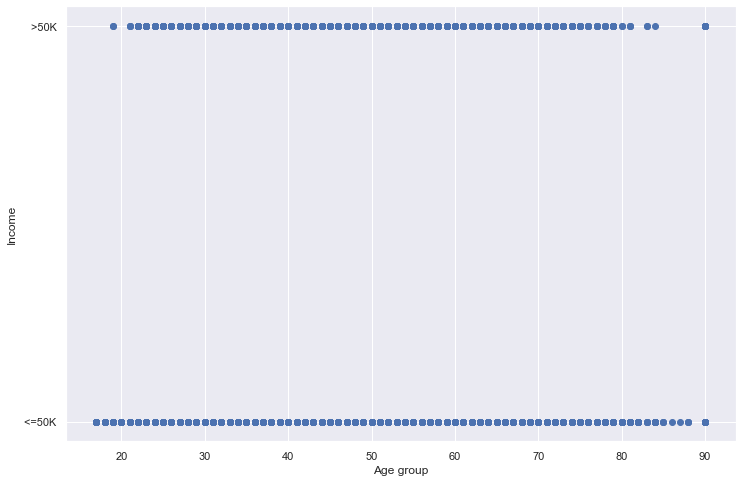

In [153]:
plt.scatter(y=df['Income'],x = df['Age'])
plt.ylabel('Income')
plt.xlabel('Age group')

ValueError: could not convert string to float: ' <=50K'

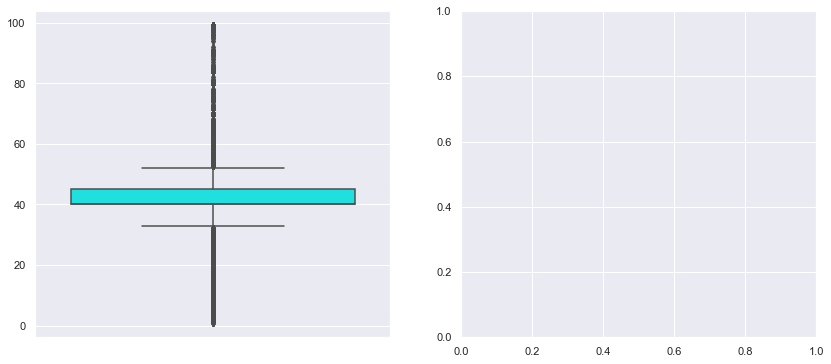

In [154]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='Hours_per_week', data=df,color='cyan')
plt.ylabel('',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['Income'], color='b')
plt.xlabel('Income',fontsize=15)
plt.tight_layout()
plt.show()

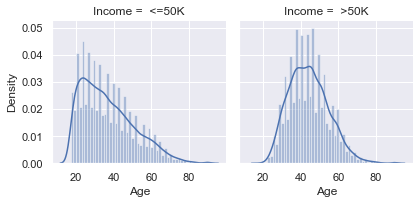

In [155]:
# Distribution of age with income categories
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

##Observation:
Here comes an interesting observation. We already know that only 24% people earnings more than 50K dollors and this plot tell us which age group then belong.

almost 10 % people in age group of 19-30 earns more than 50 K dollars and this count drop even more in old peoples having age greater than 70. Might be some lucky old ones has created good Retirement Plan compare to rest old peoples.
We can find maximum people earning more than 50K dollors belong to age group 41-50 & 51-60. It will be interesting to find out which profession lead this income to this category.


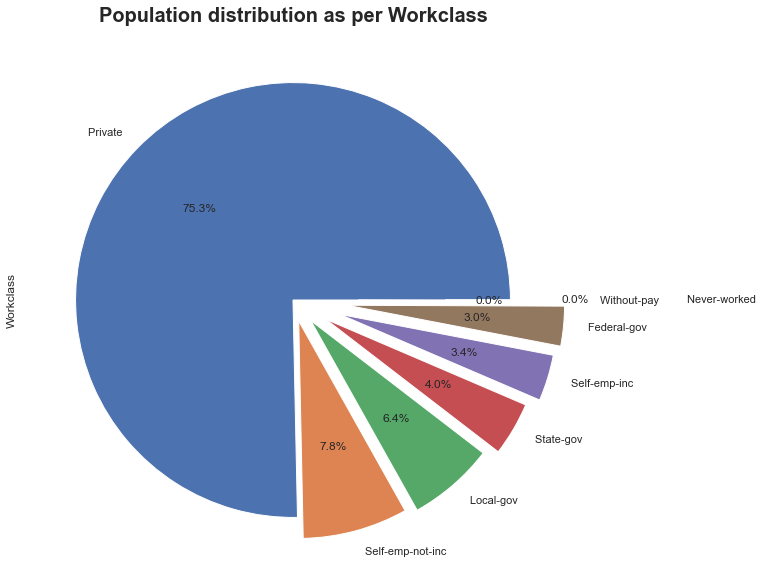

In [156]:
#NOW PLOTTING PIE AND COUNT PLOT TO CHECK THE POPULATION DISTRIBUTION AS PER WORKCLASS
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%')
                                        
plt.title('Population distribution as per Workclass', fontsize=20,fontweight ='bold')

plt.show()

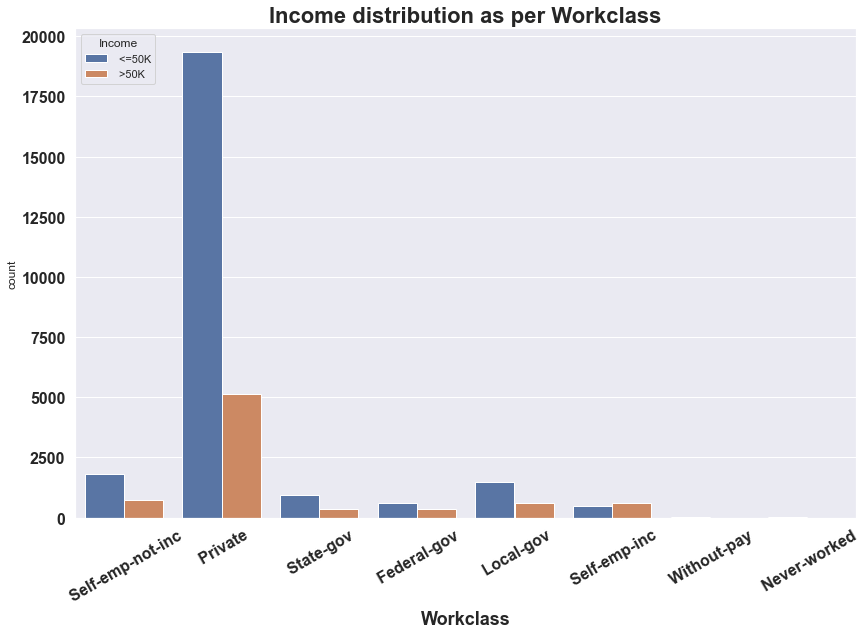

In [157]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Workclass'], hue=df['Income'])
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

In [158]:
pd.crosstab(df['Income'],df["Workclass"], margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


##OBSERVATIONS:

1. 75.3% people belongs to Private sector followed by Self Emplyoed not Incorporated with 7.8 %

2. Interseting observation comes with Self-Employed Incorporated category where the number of people who earn more than 50K dollars exceed those earning less than it !

3. There is significant difference between private sector employees income where less than 25 % people earn more than 50K dollars an year.

4. Another quite surprising insight comes from Federal Goverment countplot where We can see very minute difference between the number of people whose income is more or less than 50K dollars an year. Same goes with state goverment with some difference.

5. Yes there exist category for who never worked and Working without pay but very few people belong to it.These people may be unempolyeed or colleges students. But Number is less And thats Good !!!

6. Certainly Goverment Emplyoees have high wages compare to private !!!

In [ ]:
##EDUCATION VS INCOME

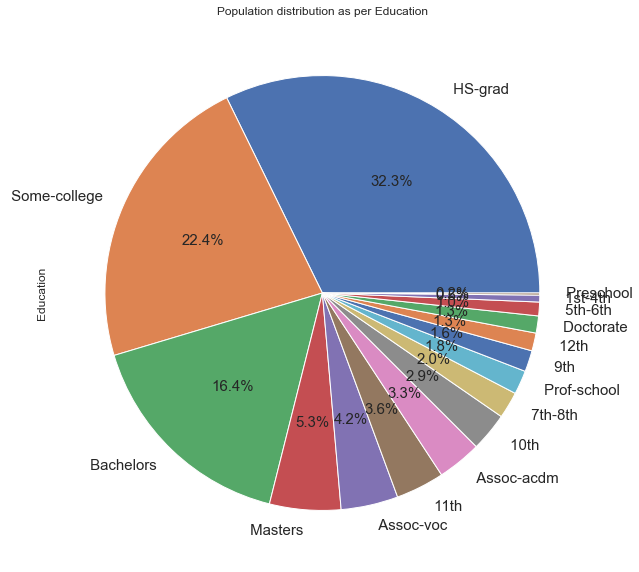

In [159]:
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%',fontsize=15)
plt.title("Population distribution as per Education")

plt.show()

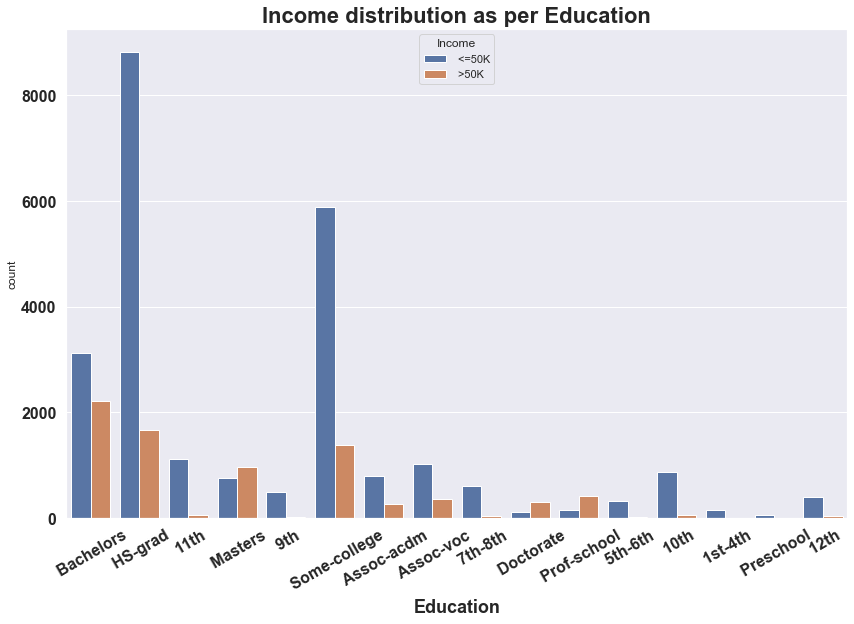

In [160]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Education'], hue=df['Income'])
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')

plt.show()

##OBSERVATIONS
Observation:
1. Out of all population 32.3% people with HS-Grad education which is most prevalent education level.
2. 5.3 % people with masters and 1.3 % population is Doctorate degree holder. Highly educated & intellactual people belongs to this category.
3. There are very handful people who earn more than 50 K dollars having education below 12th level.
4. Maximum number of people who earn more than 50K dollars are Bachelors degree holder.
5. Here comes interesting observation about income of highly educated people. In case of people belonging to Masters, Doctorate and Prof-School category in the education level, the number people earning more than 50K dollars an year outnumber than the number of people earning less than it.

In [161]:
pd.crosstab(df['Education'],df["Income"].T, margins=True)

Income,<=50K,>50K,All
Education,,,
10th,871,62,933
11th,1115,60,1175
12th,400,33,433
1st-4th,160,6,166
5th-6th,316,16,332
7th-8th,605,40,645
9th,487,27,514
Assoc-acdm,802,265,1067
Assoc-voc,1021,361,1382


##1.  Around 80% of total educated population earns less thann 50k
2. Max people with high education earns more than 50k

## Impact of Marital Status on Income

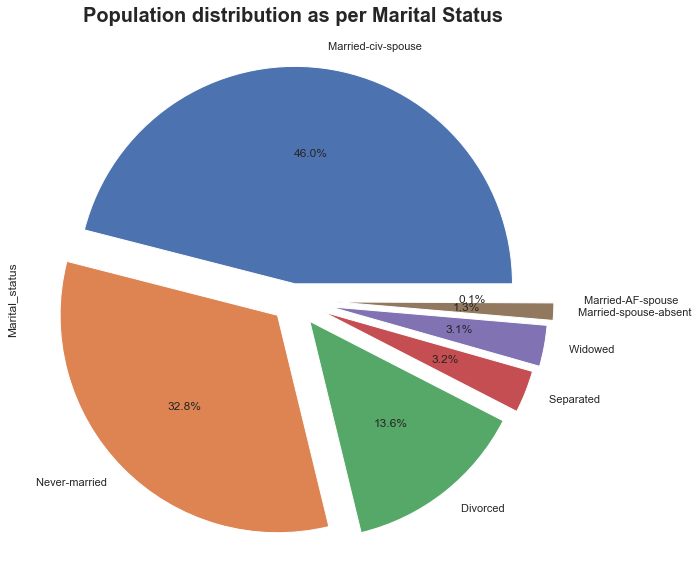

In [162]:
plt.figure(figsize=(10,10))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%', explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225])
plt.title('Population distribution as per Marital Status', fontsize=20,fontweight ='bold')

plt.show()

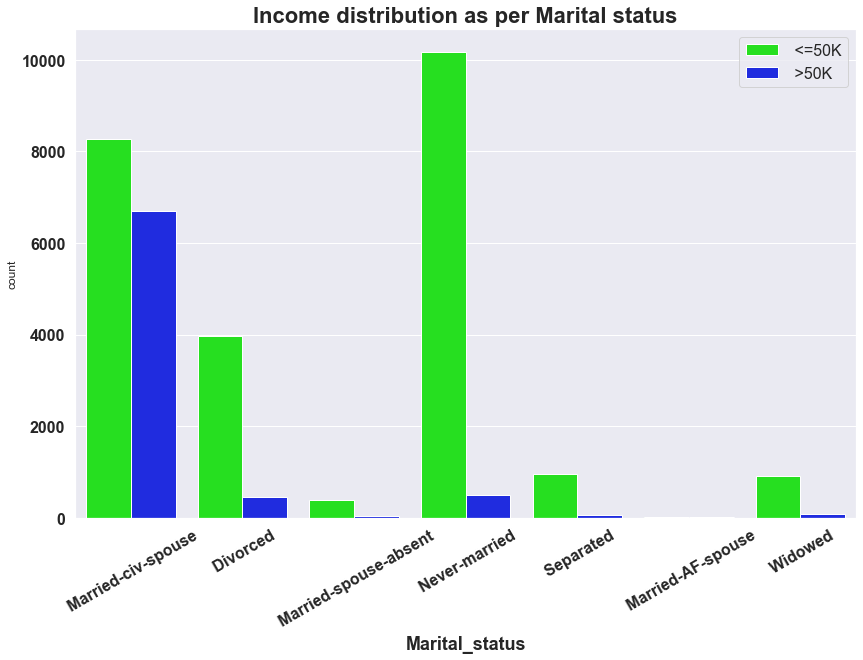

In [163]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Marital_status'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Marital status', fontsize=22, fontweight='bold')
p.set_xlabel('Marital_status',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

In [164]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True)

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


## Observation :
1. Married people are most like to earn more than 50K dollars an year.

2. Reason Might be Emotional support and stability of life than who are divorced/separated.

3. One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
4. For others, there are less than 25% of the adults earning more than 50K dollars an year.


## Occupation VS Income

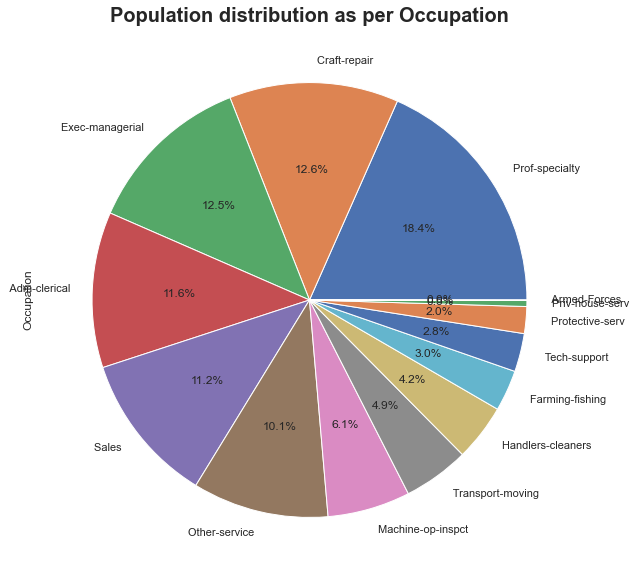

In [165]:
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%')
plt.title('Population distribution as per Occupation', fontsize=20,fontweight ='bold')

plt.show()

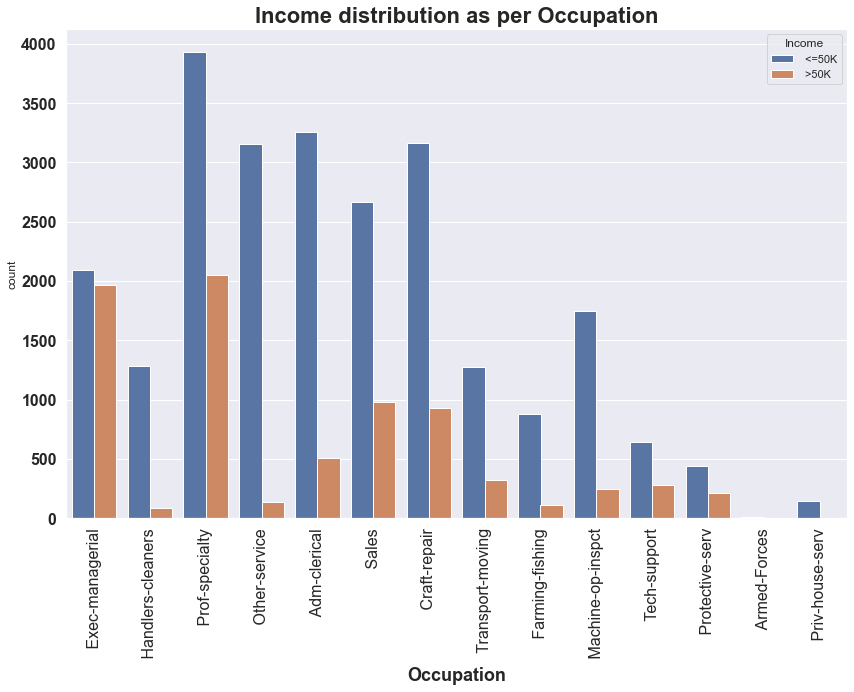

In [166]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Occupation'], hue=df['Income'])
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Occupation',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')

plt.show()


## Observation :
1. Exec-managerialand prof speciality role are equally likely to earn more than 50K dollars an year.
2. Peoples working in Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.
3. Around 25% of the people working in Sales earn more than 50K dollars an year.
4. majority of people are earing less than 50 k.

In [167]:

pd.crosstab(df['Occupation'],df["Income"], margins=True)

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


##
1. Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 people leads chart for greater than 50K dollars an year.
2. If we talk in term of percentage probablity Exective Managerial position have 50% chances to lead in Greater than 50K dollars Club.
3. There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.

## Relationship VS Income


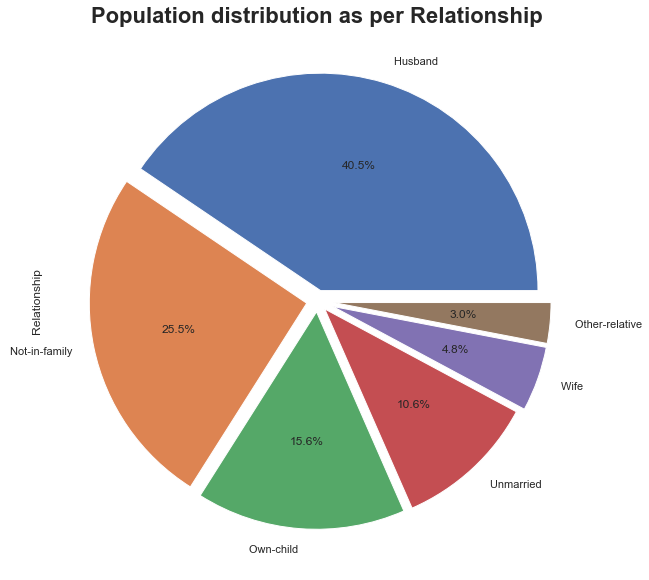

In [168]:
plt.figure(figsize=(10,10))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075]
                                           )
plt.title('Population distribution as per Relationship', fontsize=22,fontweight ='bold')

plt.show()

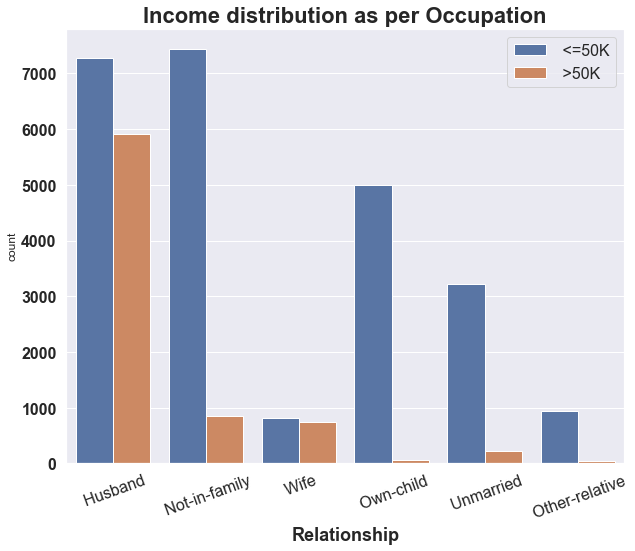

In [169]:
plt.figure(figsize=(10,8))
p = sns.countplot(df['Relationship'], hue=df['Income'])
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Relationship',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()


##Observation:
1. Wives are equally likely to earn more than 50K dollars an year.
2. for Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
3. There are just a handful of Unmarried people earning more than 50K dollars an year.

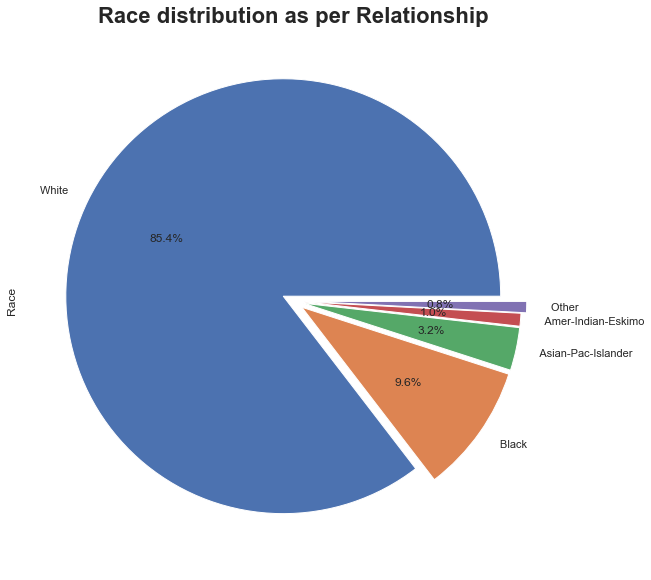

In [170]:
##Race vs Income

plt.figure(figsize=(10,10))
df['Race'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075]
                                           )
plt.title('Race distribution as per Relationship', fontsize=22,fontweight ='bold')

plt.show()


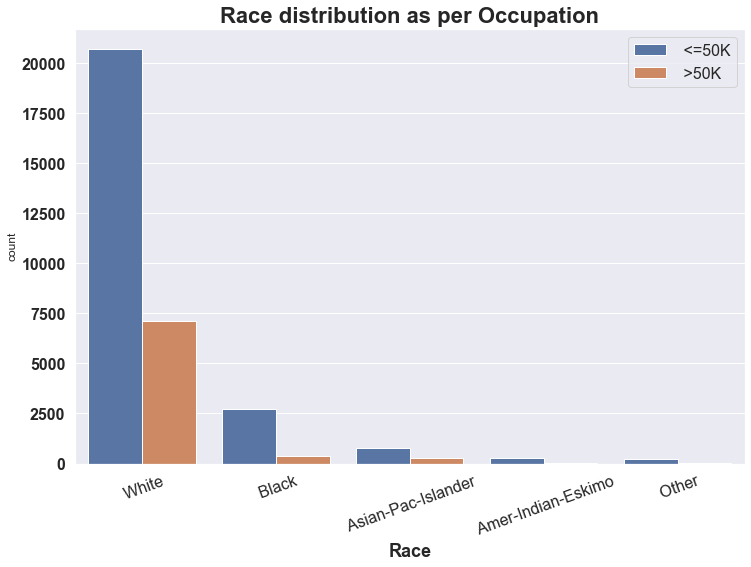

In [171]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['Race'], hue=df['Income'])
plt.title('Race distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Race',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()


In [ ]:
##This observation is biased as we have very less data of other races. So Nothing Meaningful & reliable insight we can draw from it.




In [ ]:
##Sex Vs Income

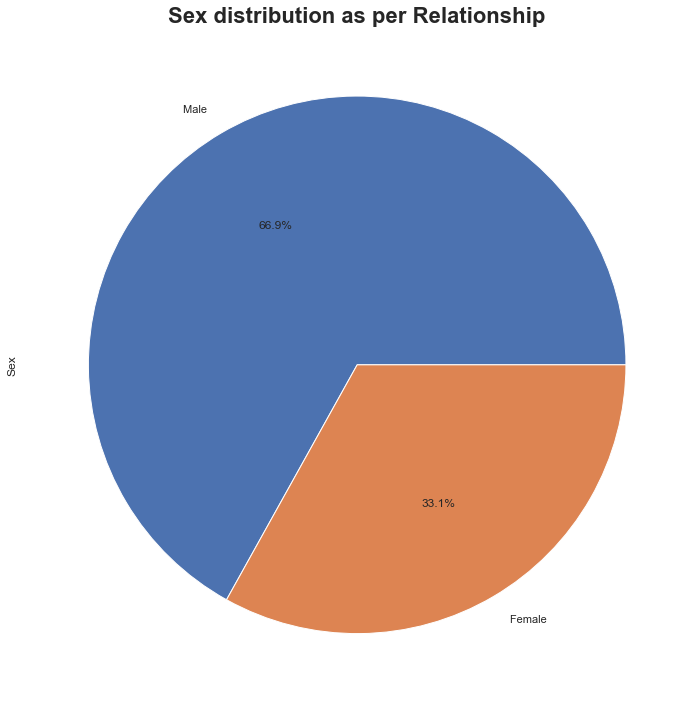

In [172]:
plt.figure(figsize=(10,10))
df['Sex'].value_counts().plot.pie(autopct='%2.1f%%')
                  
plt.title('Sex distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()


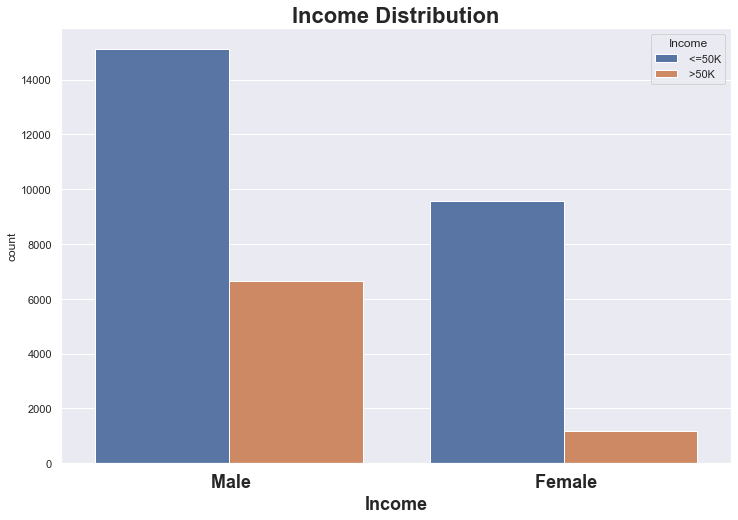

In [173]:
p=sns.countplot('Sex',hue=df['Income'] ,data=df)
p.set_title('Income Distribution',fontsize=22,fontweight ='bold')
p.set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()


##Observation:
1.Significant gap between male and female earnings.
2.Less than 10% Women in Greater Than 50K Dollar Club.
3.Around 33% of Men earning more than 50K dollars an year.
Let find in which profession these women involved in .

In [174]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True)

Sex                 Female         Male          All
Income               <=50K  >50K  <=50K  >50K       
Occupation                                          
 Adm-clerical         2323   212    937   295   3767
 Armed-Forces            0     0      8     1      9
 Craft-repair          202    20   2963   909   4094
 Exec-managerial       879   280   1218  1688   4065
 Farming-fishing        63     2    814   113    992
 Handlers-cleaners     160     4   1123    82   1369
 Machine-op-inspct     529    20   1222   229   2000
 Other-service        1748    51   1406    86   3291
 Priv-house-serv       138     1      8     0    147
 Prof-specialty       1917   437   2013  1612   5979
 Protective-serv        66    10    372   201    649
 Sales                1175    88   1492   895   3650
 Tech-support          302    45    342   238    927
 Transport-moving       81     9   1196   311   1597
All                   9583  1179  15114  6660  32536

##Observation:
1. Out of all population 33 % are womens. Inside that most of females work in Adm-clerical,Other-service,Prof-specialty.
2. Same as in case of Men Maximum number in Greater than 50K dollars Club in females comes from Prof-speciality,Exec-Managerial profession.
3. Maximum men work in Prof-Specialty.

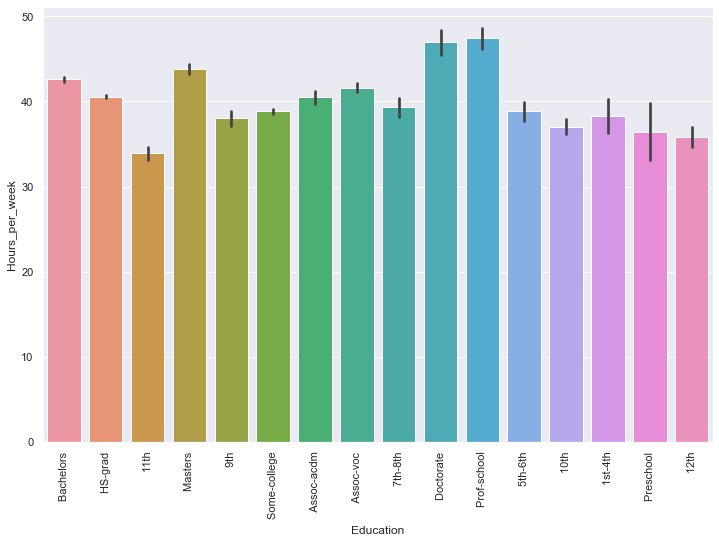

In [175]:
 #This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

## Encoding categorical data


In [176]:
# Separating numerical and categorical variable
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [177]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [ ]:
##Feature selection and Engineering

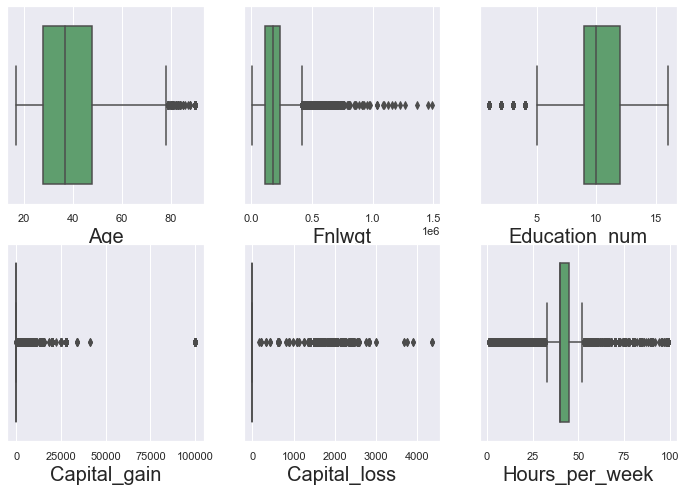

In [178]:
##
#1. Outliers Detection and Removalplt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()



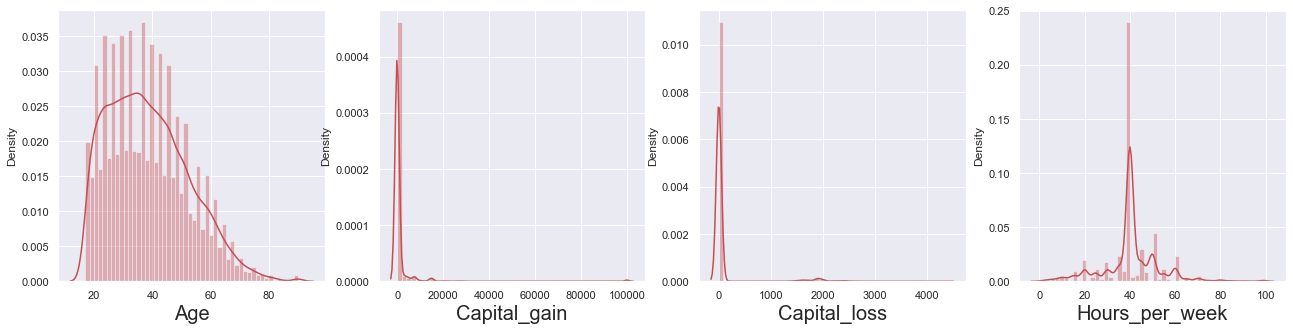

In [179]:
#2.2. Skewness of features
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [180]:
df.skew()

Age                0.557657
Workclass          0.075983
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.000407
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -4.247065
Income             1.211640
dtype: float64

##Observation :
Relationship,Sex,Native_country,Income are skewed but as they are categorical concept of skewness doesnot mean anything to it.
Capital_gain and Capital_loss are numeric variable with lot of zero and high number. So skewness exist in them. There is no point in transforming it because at end data will be skewed.



## 3. Corrleation

In [181]:

df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,-0.076448,-0.010551,0.036224,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,-0.024189,0.004852,0.003412,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747
Fnlwgt,-0.076448,-0.024189,1.000000,-0.028065,-0.043353,0.028154,-0.000073,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.063073,-0.009521
Education,-0.010551,0.004852,-0.028065,1.000000,0.359105,-0.038413,-0.041258,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.075498,0.079361
Education_num,0.036224,0.003412,-0.043353,0.359105,1.000000,-0.069196,0.070965,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.088044,0.335299
Marital_status,-0.266142,-0.020506,0.028154,-0.038413,-0.069196,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187
Occupation,0.001756,0.007285,-0.000073,-0.041258,0.070965,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,0.008859,-0.011060,-0.094424,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,-0.021484,0.014307,0.031998,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.027113,-0.027426,0.012181,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984


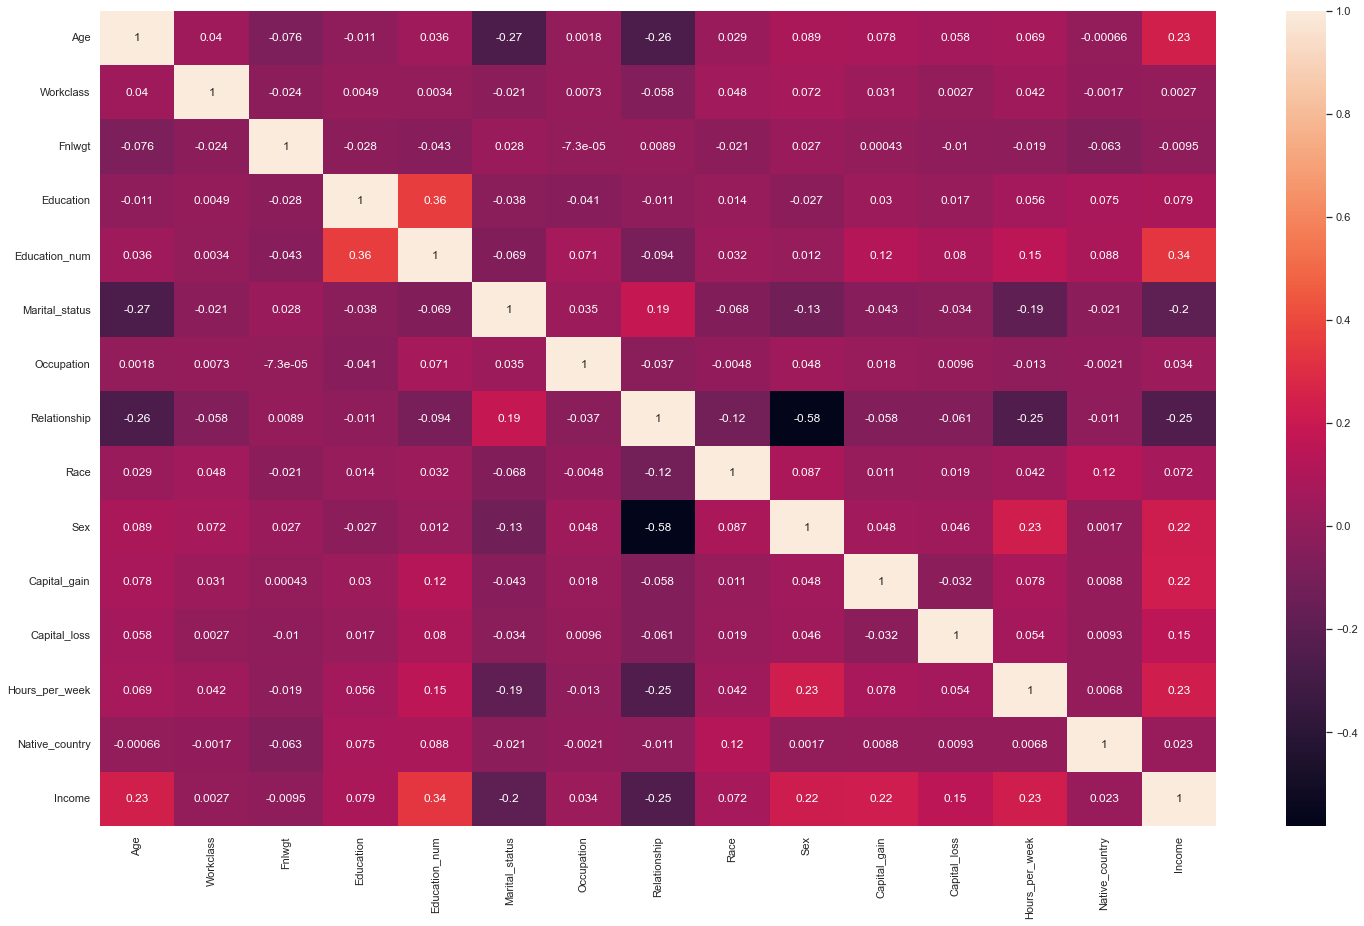

In [182]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

plt.show()

##Observation:
Capital loss and workclass,occupation, native country, race are correlated with target variable with less than 10% correlation. After checking Mulitcollinearity we will decide to drop these poorly correlated features or go for PCA.

As high or low Correlation doesnot mean its causation !!!

Between input features maximum correlation of -0.557 exist between sex and relationship.

In [183]:

# Splitting data in target and dependent feature
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [184]:
##Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)


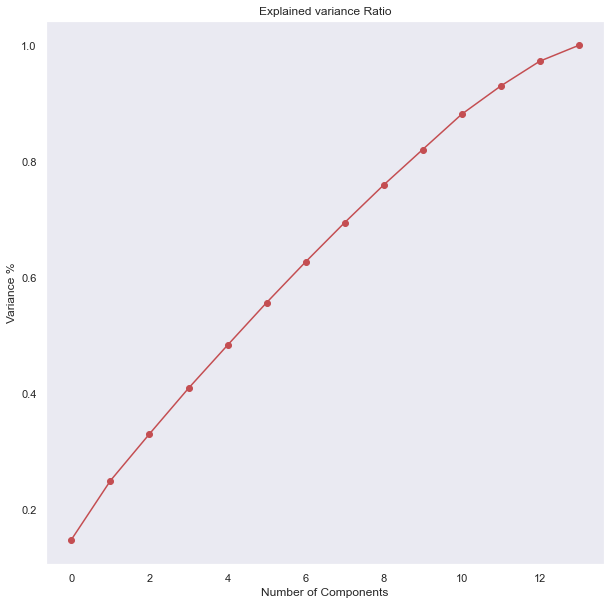

In [185]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [ ]:
##Comment -
#AS per the graph, we can see that 9 principal components attribute for 
#90% of variation in the data. We shall pick the first 9 components for our prediction.


In [186]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)
principle_x=pd.DataFrame(x_new,columns=np.arange(9))


In [187]:
#Machine Learning Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


Training feature matrix size: (22775, 9)
Training target vector size: (22775,)
Test feature matrix size: (9761, 9)
Test target vector size: (9761,)


In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8314721852269235 on Random_state 210


In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=210, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8314721852269235


Confusion matrix of Logistics Regression : 
 [[7086  416]
 [1229 1030]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.85      0.94      0.90      7502
           1       0.71      0.46      0.56      2259

    accuracy                           0.83      9761
   macro avg       0.78      0.70      0.73      9761
weighted avg       0.82      0.83      0.82      9761



In [191]:
#Applying other classification algorithm
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8314721852269235


Confusion matrix : 
 [[7086  416]
 [1229 1030]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.94      0.90      7502
           1       0.71      0.46      0.56      2259

    accuracy                           0.83      9761
   macro avg       0.78      0.70      0.73      9761
weighted avg       0.82      0.83      0.82      9761



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8481712939248028


Confusion matrix : 
 [[7086  416]
 [1066 1193]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      7502
           1       0.74      0.53      0.62      2259

    accuracy                           0.85      9761
   macro avg       0.81      0.74      0.76      9761
weighted avg       0.84      0.85      0

In [192]:
#Final Model
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split= 8)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8488884335621351
